In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv("C:/Users/sadma/Desktop/sales_by_class_day.csv")

In [4]:
df.head()

index                 Date ClassCode       ClassName  \
0      0  2014-01-02 00:00:00       NaN           BLANK   
1      1  2014-01-02 00:00:00       001   SPRUCE LUMBER   
2      2  2014-01-02 00:00:00       002  TREATED LUMBER   
3      3  2014-01-02 00:00:00       003     PINE LUMBER   
4      4  2014-01-02 00:00:00       004         ROOFING   

   1PAYZANTS-SACKVILLENetSales  2PAYZANTSBURNSIDENetSales  3PAYZANTNBNetSales  \
0                        25.21                       0.03                0.10   
1                      2764.54                    1577.13               68.88   
2                        79.20                     191.28                0.00   
3                       528.03                      33.60               97.48   
4                      -160.93                     589.35                0.00   

   4PAYZANTS-PORTERSLAKENetSales  5PAYZANTS-ENFIELDNetSales  
0                            0.0                        0.0  
1                            0.0                        0.0  
2                            0.0                        0.0  
3                            0.0                        0.0  
4                            0.0                        0.0

In [5]:
spruce = df.loc[df['ClassName'] == 'TREATED LUMBER']

In [6]:
spruce.head()

index                 Date ClassCode       ClassName  \
2        2  2014-01-02 00:00:00       002  TREATED LUMBER   
71      71  2014-01-03 00:00:00       002  TREATED LUMBER   
122    122  2014-01-04 00:00:00       002  TREATED LUMBER   
187    187  2014-01-05 00:00:00       002  TREATED LUMBER   
243    243  2014-01-06 00:00:00       002  TREATED LUMBER   

     1PAYZANTS-SACKVILLENetSales  2PAYZANTSBURNSIDENetSales  \
2                          79.20                     191.28   
71                          0.00                       0.00   
122                        28.64                       0.00   
187                         3.75                       0.00   
243                      1005.49                     841.01   

     3PAYZANTNBNetSales  4PAYZANTS-PORTERSLAKENetSales  \
2                  0.00                            0.0   
71                 9.07                            0.0   
122               32.55                            0.0   
187                0.00                            0.0   
243                0.00                            0.0   

     5PAYZANTS-ENFIELDNetSales  
2                          0.0  
71                         0.0  
122                        0.0  
187                        0.0  
243                        0.0

In [7]:
spruce['Date'].min(), spruce['Date'].max()

('2014-01-02 00:00:00', '2018-12-31 00:00:00')

In [8]:
cols = ['index', 'ClassCode', 'ClassName']
spruce.drop(cols, axis=1, inplace=True)
spruce = spruce.sort_values('Date')
spruce.isnull().sum()

Date                             0
1PAYZANTS-SACKVILLENetSales      0
2PAYZANTSBURNSIDENetSales        0
3PAYZANTNBNetSales               0
4PAYZANTS-PORTERSLAKENetSales    0
5PAYZANTS-ENFIELDNetSales        0
dtype: int64

In [9]:
spruce['Date'] = pd.to_datetime(df['Date'])
spruce = spruce.set_index('Date')
spruce.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-11',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1757, freq=None)

In [10]:
y1 = spruce['1PAYZANTS-SACKVILLENetSales'].resample('MS').mean()
y2 = spruce['2PAYZANTSBURNSIDENetSales'].resample('MS').mean()
y3 = spruce['3PAYZANTNBNetSales'].resample('MS').mean()
y4 = spruce['4PAYZANTS-PORTERSLAKENetSales'].resample('MS').mean()
y5 = spruce['5PAYZANTS-ENFIELDNetSales'].resample('MS').mean()

In [11]:
y1.head()

Date
2014-01-01     896.803667
2014-02-01     901.677308
2014-03-01    1246.434828
2014-04-01    3240.079286
2014-05-01    7079.159677
Freq: MS, Name: 1PAYZANTS-SACKVILLENetSales, dtype: float64

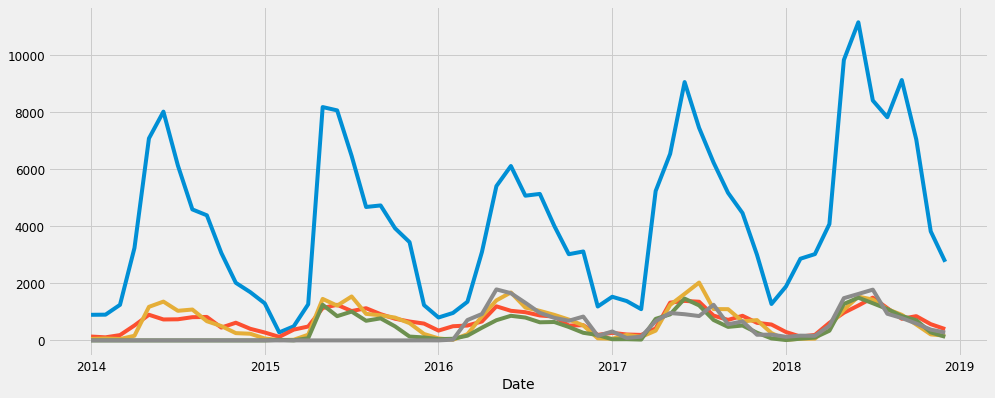

In [12]:
y1.plot(figsize=(15, 6))
y2.plot(figsize=(15, 6))
y3.plot(figsize=(15, 6))
y4.plot(figsize=(15, 6))
y5.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

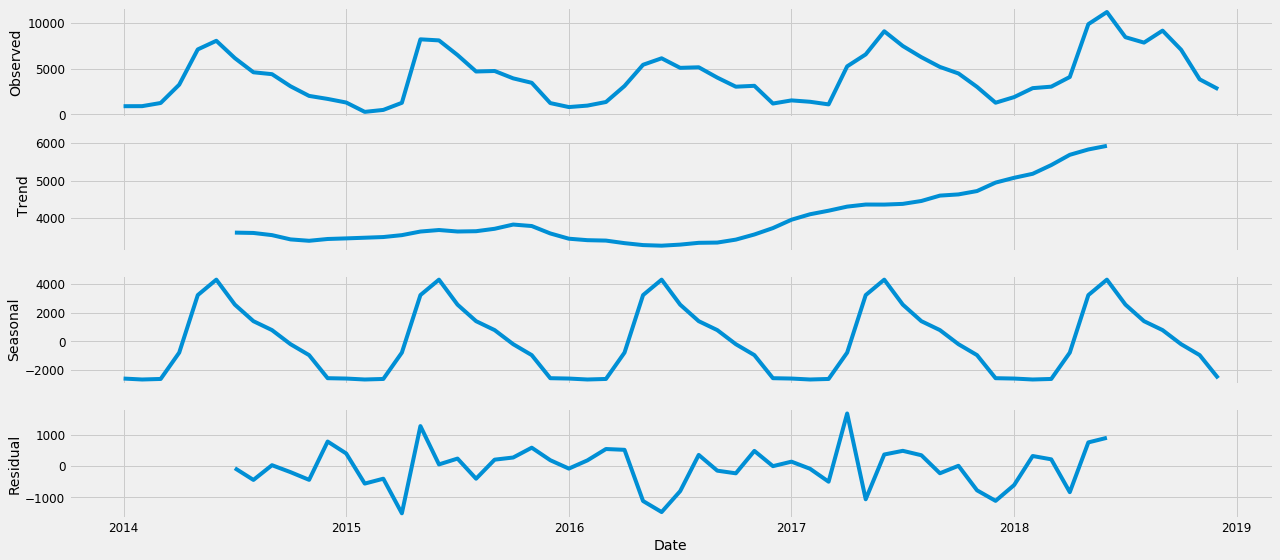

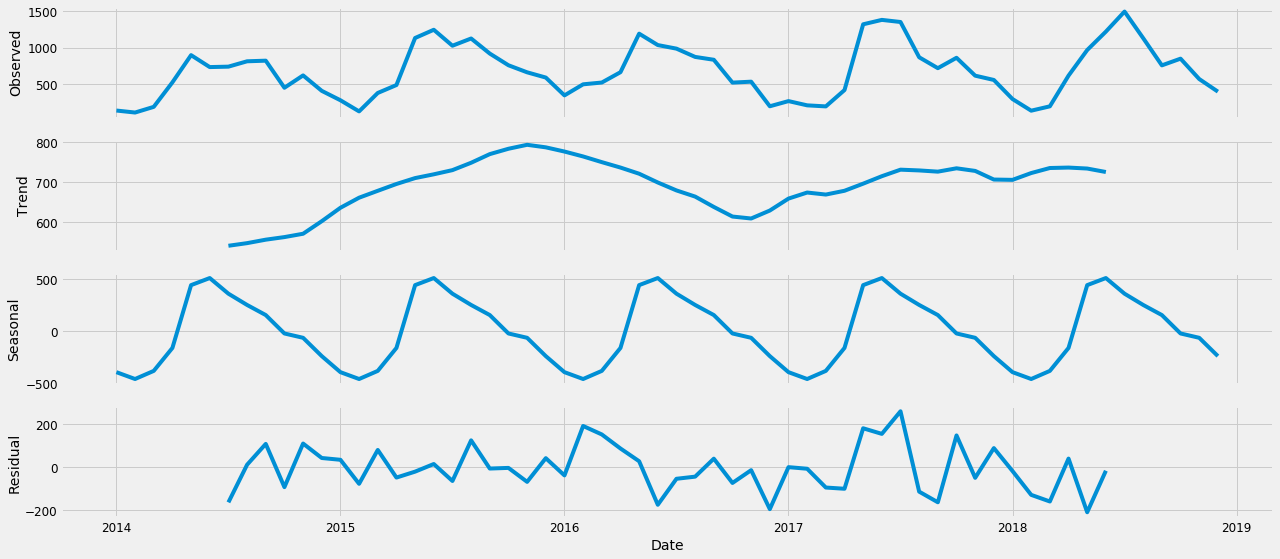

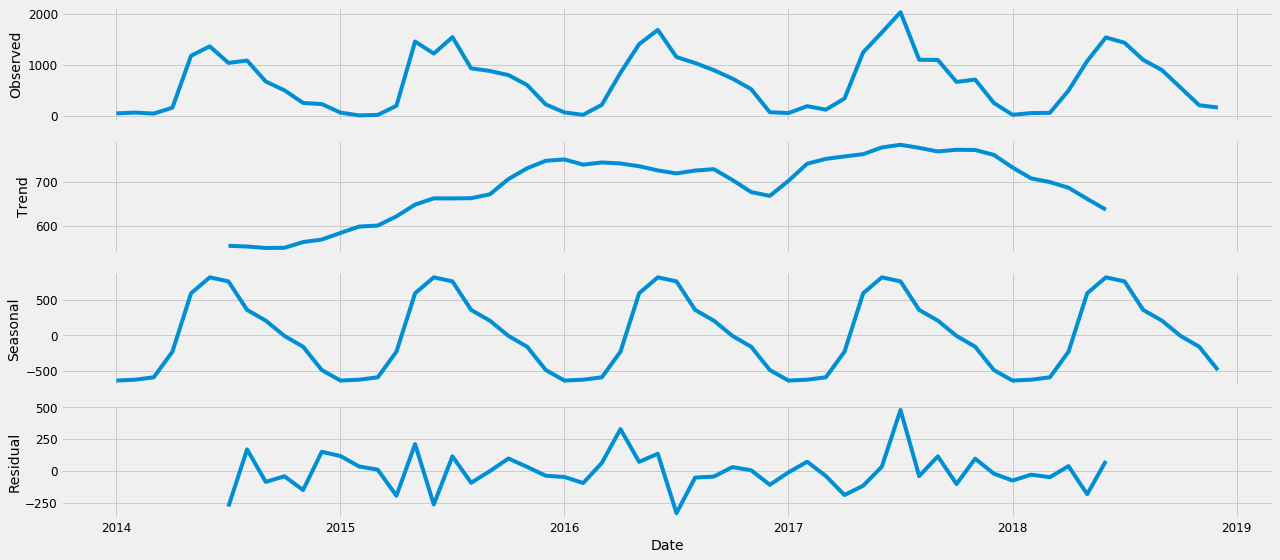

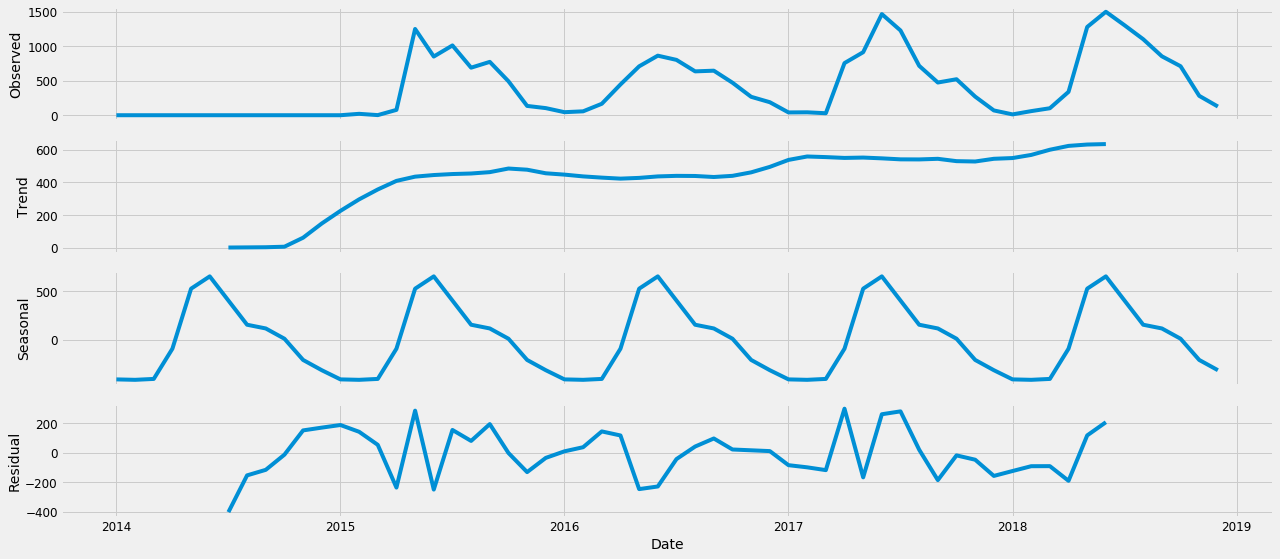

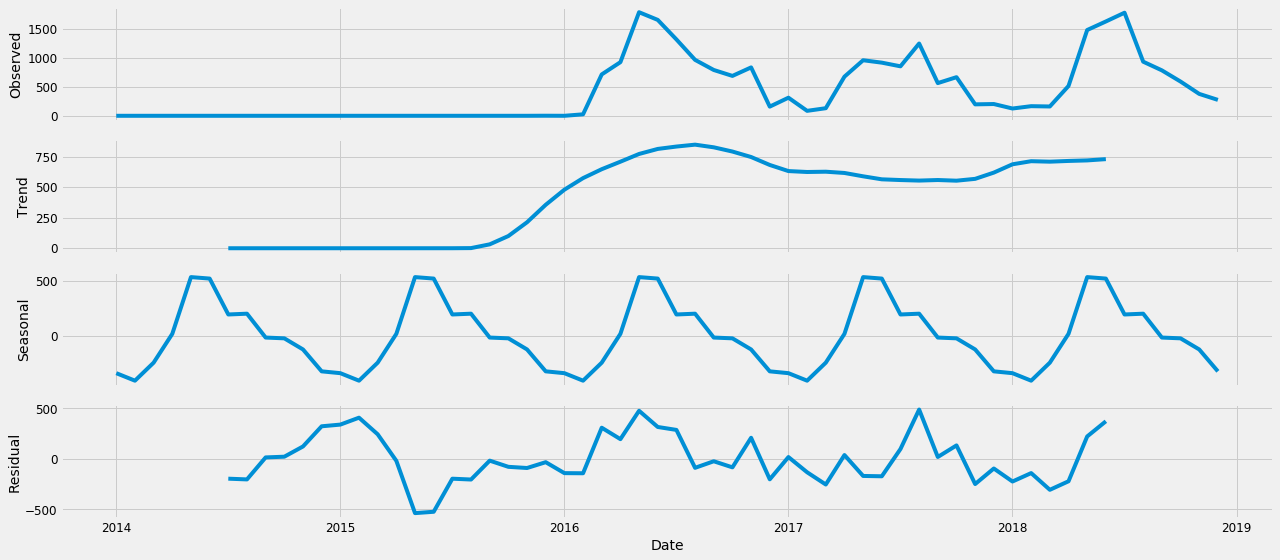

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition1 = sm.tsa.seasonal_decompose(y1, model='additive')
decomposition2 = sm.tsa.seasonal_decompose(y2, model='additive')
decomposition3 = sm.tsa.seasonal_decompose(y3, model='additive')
decomposition4 = sm.tsa.seasonal_decompose(y4, model='additive')
decomposition5 = sm.tsa.seasonal_decompose(y5, model='additive')



fig1 = decomposition1.plot()
fig2 = decomposition2.plot()
fig3 = decomposition3.plot()
fig4 = decomposition4.plot()
fig5 = decomposition5.plot()
plt.show()

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

In [14]:
mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2699      0.337      0.800      0.424      -0.391       0.931
ma.L1         -1.1401      0.212     -5.377      0.000      -1.556      -0.725
ar.S.L12      -0.2908      0.228     -1.276      0.202      -0.737       0.156
sigma2      1.491e+06   8.39e+05      1.776      0.076   -1.54e+05    3.14e+06


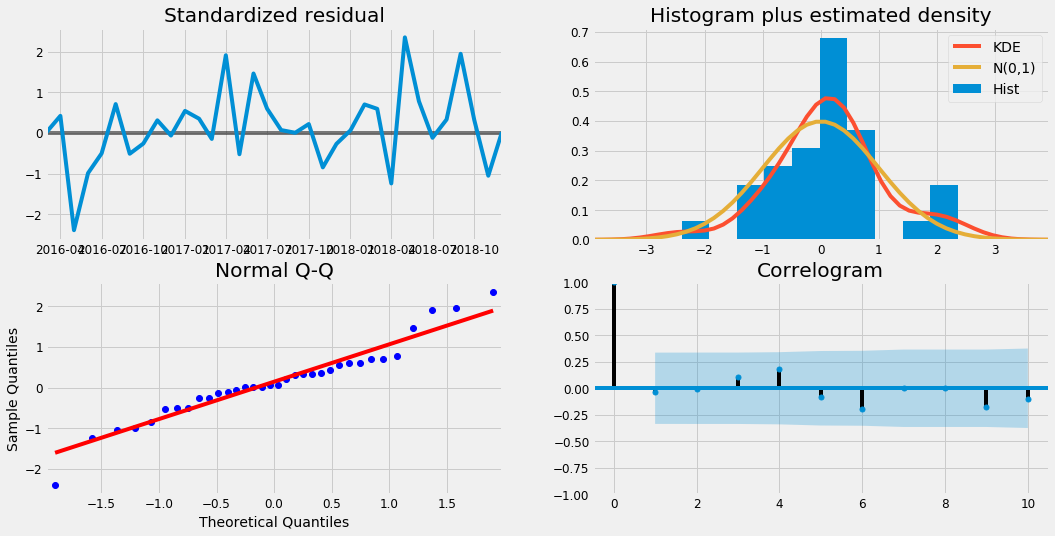

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

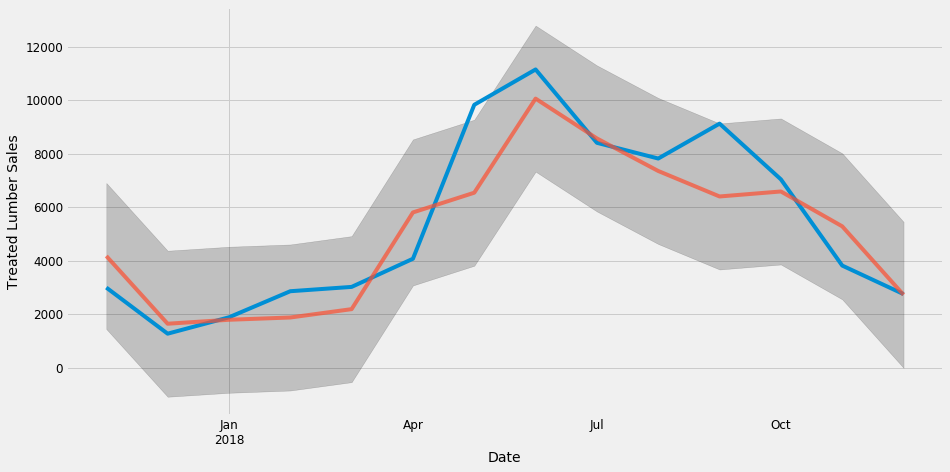

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-11-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y1['2017-11-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Treated Lumber Sales')
#plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y1['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 2012024.33
The Root Mean Squared Error of our forecasts is 1418.46


In [ ]:
data = pd.read_csv('/Users/ashwin/Desktop/data/csv/tbl_sales_by_day.csv')

In [ ]:
data.head()

In [ ]:
net = data['1PAYZANTS-SACKVILLENetSales'].sum()
count = data['1PAYZANTS-SACKVILLECountSalesHeader'].sum()
corr = net/count
corr